In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#### TODO install geopandas
#import geopandas as gp
from sklearn.preprocessing import normalize, MinMaxScaler
from scipy.sparse import coo_matrix, csr_matrix

Read in standardized csv files and merge them into one Dataframe

In [159]:
df_form = pd.read_csv("formationout.csv")
df_well = pd.read_csv("out.csv")
#Merge the 2 CSVs by API number
df_merged = df_well.merge(df_form, how = "left", on = "API Number")
#drop well number identifier since we are using API number
df_merged.drop(columns="Well Number", inplace = True)
print(df_merged.head())

     API Number  Northing   Easting  True Vertical Depth  Normalized TVD  \
0  490251039700  974652.3  794810.9              -2007.0        0.451998   
1  490251039700  974652.3  794810.9              -2007.0        0.451998   
2  490251039700  974652.3  794810.9              -2007.0        0.451998   
3  490251039700  974652.3  794810.9              -2007.0        0.451998   
4  490251039700  974652.3  794810.9              -2007.0        0.451998   

   Form Alias   Top MD  
0        22.0  1564.04  
1        19.0   910.29  
2        10.0  2785.42  
3        20.0  1461.42  
4        23.0   527.25  


Taking a sample of the Dataframe to holdout 

In [178]:
df_holdout = df_merged.sample(frac=0.2, random_state=4242001)
#make list of API numbers that we held out
heldout_APIs = []
for i in df_holdout["API Number"]:
    heldout_APIs.append(i)
#now we need to go back to our original Dataframe and set the vals we are holding out to 0
print(df_holdout.head())
df_merged_heldout = df_merged.copy()
df_merged_heldout.iloc[2933, 6] = 0
df_merged_heldout.iloc[2439, 6] = 0
df_merged_heldout.iloc[3298, 6] = 0
df_merged_heldout.iloc[542, 6] = 0
df_merged_heldout.iloc[5466, 6] = 0


        API Number  Northing   Easting  True Vertical Depth  Normalized TVD  \
2933  490251070700  961733.9  802774.0              -4401.0        0.095110   
2439  490251059500  965073.6  794723.3              -2121.5        0.434928   
3298  490251078100  967006.2  796184.8              -1015.0        0.599881   
542   490250952100  974478.6  792059.1              -2268.0        0.413089   
5466  490251118100  973327.5  794161.2              -2076.6        0.441622   

      Form Alias   Top MD  
2933         2.0    54.74  
2439        18.0  2783.22  
3298         0.0   229.35  
542          9.0  2293.08  
5466         8.0  2369.47  


Make a sparse matrix from the Dataframe heldout

In [161]:
D_df = df_merged_heldout.pivot_table("Top MD","Form Alias","API Number").fillna(0)

API Number,490250632500,490250632700,490250632800,490250632900,490250633200,490250633400,490250633800,490250633900,490250634000,490250634100,...,490252284701,490252303100,490252304000,490252304700,490252304800,490252305400,490252305500,490252319500,490252345102,490252347904
Form Alias,,,,,,,,,,,,,,,,,,,,,
0.0,659.21,877.38,758.13,1008.06,1153.97,878.61,0.00,995.26,736.08,864.05,...,0.00,360.260,272.85,573.410,0.000,350.620,1109.54,224.740,215.69,0.00
1.0,295.64,503.67,403.90,636.30,784.37,514.77,0.00,636.98,359.02,488.76,...,0.00,0.000,0.00,196.090,0.000,0.000,662.67,0.000,0.00,0.00
2.0,246.11,455.35,356.96,587.49,737.05,469.29,0.00,593.88,310.83,441.42,...,0.00,0.000,0.00,151.630,0.000,0.000,616.08,0.000,0.00,0.00
3.0,745.70,963.16,845.31,1095.43,1245.16,965.34,0.00,1085.68,824.01,951.11,...,0.00,441.700,356.67,667.490,0.000,438.070,1187.81,311.840,302.07,0.00
4.0,0.00,0.00,917.85,1166.07,1313.05,1035.14,0.00,1156.66,0.00,1021.27,...,0.00,517.560,428.40,0.000,0.000,511.170,1266.07,386.040,376.00,0.00
5.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1872.960,0.00,2083.850,1958.530,1854.770,0.00,1758.000,1793.86,0.00
6.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,2092.950,0.00,2318.600,2191.500,2096.960,0.00,1994.000,2017.55,2037.50
7.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,2313.800,2207.91,2543.050,2416.135,2314.750,0.00,2222.000,2238.18,2262.85
8.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,2545.010,2447.05,2785.600,2663.945,2558.720,0.00,2470.840,2474.86,2505.13


Trying different ways of normalizing R, demeaning and normalizing with SKLearn

In [164]:
mms = MinMaxScaler()
R = D_df.values
target_vals = df_holdout["Top MD"]
well_depth_mean = np.mean(R, axis = 1)
R_normalize = mms.fit_transform(R, target_vals)
R_demeaned = R - well_depth_mean.reshape(-1, 1)

Create binarized matrix with values of 1 where there are depth values in the sparse matrix R and values of 0 where there are not depth values in the sparse matrix R.

In [165]:
from sklearn.preprocessing import binarize
A = binarize(R)

This is the code that runs Alternating Least Squares factorization

In [166]:
#ALS factorization from 
# https://github.com/mickeykedia/Matrix-Factorization-ALS/blob/master/ALS%20Python%20Implementation.py
# here items are the formation and users are the well
def runALS(A, R, n_factors, n_iterations, lambda_):
    """
    Runs Alternating Least Squares algorithm in order to calculate matrix.
    :param A: User-Item Matrix with ratings
    :param R: User-Item Matrix with 1 if there is a rating or 0 if not
    :param n_factors: How many factors each of user and item matrix will consider
    :param n_iterations: How many times to run algorithm
    :param lambda_: Regularization parameter
    :return:
    """
    print("Initiating ")
    MAE = []
    for i in range(1, n_factors):
        lambda_ = lambda_
        n_factors = i
        n, m = A.shape
        n_iterations = n_iterations
        Users = 5 * np.random.rand(n, n_factors)
        Items = 5 * np.random.rand(n_factors, m)

        def get_error(A, Users, Items, R):
            # This calculates the MSE of nonzero elements
            return np.sum((R * (A - np.dot(Users, Items))) ** 2) / np.sum(R)

        MSE_List = []

        print("Starting Iterations")
        for iter in range(n_iterations):
            for i, Ri in enumerate(R):
                Users[i] = np.linalg.solve(
                    np.dot(Items, np.dot(np.diag(Ri), Items.T))
                    + lambda_ * np.eye(n_factors),
                    np.dot(Items, np.dot(np.diag(Ri), A[i].T)),
                    ).T
            print(
                "Error after solving for User Matrix:",
                get_error(A, Users, Items, R),
                )

            for j, Rj in enumerate(R.T):
                Items[:, j] = np.linalg.solve(
                    np.dot(Users.T, np.dot(np.diag(Rj), Users))
                    + lambda_ * np.eye(n_factors),
                    np.dot(Users.T, np.dot(np.diag(Rj), A[:, j])),
                    )
            print(
                "Error after solving for Item Matrix:",
                 get_error(A, Users, Items, R),
                )

            MSE_List.append(get_error(A, Users, Items, R))
            print("%sth iteration is complete..." % iter)
        MAE.append(MSE_List)
    return Users, Items, MAE
    
    # fig = plt.figure()
    # ax = fig.add_subplot(111)
    # plt.plot(range(1, len(MSE_List) + 1), MSE_List); plt.ylabel('Error'); plt.xlabel('Iteration')
    # plt.title('Python Implementation MSE by Iteration \n with %d formations and %d wells' % A.shape);
    # plt.savefig('Python MSE Graph.pdf', format='pdf')
    # plt.show()

In [167]:
U, Vt, MAE_list = runALS(R_normalize, A, 20, 20, 0.1)

Initiating 
Starting Iterations
Error after solving for User Matrix: 0.18833719299133192
Error after solving for Item Matrix: 0.09600722010575234
0th iteration is complete...
Error after solving for User Matrix: 0.06526334317261856
Error after solving for Item Matrix: 0.06668658188496532
1th iteration is complete...
Error after solving for User Matrix: 0.05107835887503253
Error after solving for Item Matrix: 0.05266577021775912
2th iteration is complete...
Error after solving for User Matrix: 0.04270440737895524
Error after solving for Item Matrix: 0.04375365124097037
3th iteration is complete...
Error after solving for User Matrix: 0.036680041046753535
Error after solving for Item Matrix: 0.03745246710552351
4th iteration is complete...
Error after solving for User Matrix: 0.032139673114511866
Error after solving for Item Matrix: 0.032760200594921754
5th iteration is complete...
Error after solving for User Matrix: 0.028610318010354786
Error after solving for Item Matrix: 0.0291359904

Error after solving for User Matrix: 0.0005468283454882683
Error after solving for Item Matrix: 0.0007171449067050872
16th iteration is complete...
Error after solving for User Matrix: 0.0005314507414316145
Error after solving for Item Matrix: 0.0006882975315964869
17th iteration is complete...
Error after solving for User Matrix: 0.0005180307079322464
Error after solving for Item Matrix: 0.0006631394230220801
18th iteration is complete...
Error after solving for User Matrix: 0.0005065346762964283
Error after solving for Item Matrix: 0.0006414431689934022
19th iteration is complete...
Starting Iterations
Error after solving for User Matrix: 0.09319136467965274
Error after solving for Item Matrix: 0.16843327693565863
0th iteration is complete...
Error after solving for User Matrix: 0.028085008061482016
Error after solving for Item Matrix: 0.009228108283799209
1th iteration is complete...
Error after solving for User Matrix: 0.0022593556270564127
Error after solving for Item Matrix: 0.00

Error after solving for User Matrix: 0.00015856600307961893
Error after solving for Item Matrix: 0.0003297760685952402
12th iteration is complete...
Error after solving for User Matrix: 0.00013925868313546875
Error after solving for Item Matrix: 0.00029481783506351124
13th iteration is complete...
Error after solving for User Matrix: 0.00012676199384414148
Error after solving for Item Matrix: 0.0002679256519827373
14th iteration is complete...
Error after solving for User Matrix: 0.00011793741050745404
Error after solving for Item Matrix: 0.00024670662144803243
15th iteration is complete...
Error after solving for User Matrix: 0.00011113565035226091
Error after solving for Item Matrix: 0.0002299485101246099
16th iteration is complete...
Error after solving for User Matrix: 0.00010535151392636532
Error after solving for Item Matrix: 0.0002170406397228218
17th iteration is complete...
Error after solving for User Matrix: 0.00010053828477931351
Error after solving for Item Matrix: 0.00020

Error after solving for User Matrix: 0.00011996671964642078
Error after solving for Item Matrix: 0.000361991143933075
8th iteration is complete...
Error after solving for User Matrix: 0.00010390590439896846
Error after solving for Item Matrix: 0.0003133752792416191
9th iteration is complete...
Error after solving for User Matrix: 9.221538085271698e-05
Error after solving for Item Matrix: 0.00027583966239621654
10th iteration is complete...
Error after solving for User Matrix: 8.365707466134579e-05
Error after solving for Item Matrix: 0.0002459135031802861
11th iteration is complete...
Error after solving for User Matrix: 7.687593464771244e-05
Error after solving for Item Matrix: 0.00022155875553830684
12th iteration is complete...
Error after solving for User Matrix: 7.144598813013431e-05
Error after solving for Item Matrix: 0.0002017596264400505
13th iteration is complete...
Error after solving for User Matrix: 6.744819016113903e-05
Error after solving for Item Matrix: 0.0001858272140

Error after solving for User Matrix: 0.00019185396163153736
Error after solving for Item Matrix: 0.0007225505781628338
4th iteration is complete...
Error after solving for User Matrix: 0.00015778040136213545
Error after solving for Item Matrix: 0.0005393412828718315
5th iteration is complete...
Error after solving for User Matrix: 0.00013250448136345369
Error after solving for Item Matrix: 0.00042567983885854436
6th iteration is complete...
Error after solving for User Matrix: 0.00011462163115124055
Error after solving for Item Matrix: 0.00034774894809369003
7th iteration is complete...
Error after solving for User Matrix: 0.00010047716551729844
Error after solving for Item Matrix: 0.00029377100093150153
8th iteration is complete...
Error after solving for User Matrix: 8.986198369261887e-05
Error after solving for Item Matrix: 0.0002542065403248872
9th iteration is complete...
Error after solving for User Matrix: 8.145968706599785e-05
Error after solving for Item Matrix: 0.000222958154

Error after solving for User Matrix: 0.06010566355689261
Error after solving for Item Matrix: 0.28200166096407453
0th iteration is complete...
Error after solving for User Matrix: 0.008839173829190416
Error after solving for Item Matrix: 0.005811801291297798
1th iteration is complete...
Error after solving for User Matrix: 0.00036141986840065567
Error after solving for Item Matrix: 0.002174219450789727
2th iteration is complete...
Error after solving for User Matrix: 0.00017587135853124056
Error after solving for Item Matrix: 0.0010628770664712092
3th iteration is complete...
Error after solving for User Matrix: 0.00011195955862449206
Error after solving for Item Matrix: 0.000697070746515379
4th iteration is complete...
Error after solving for User Matrix: 8.933833381533235e-05
Error after solving for Item Matrix: 0.0005163806805074341
5th iteration is complete...
Error after solving for User Matrix: 7.512266340433982e-05
Error after solving for Item Matrix: 0.00040509085643269065
6th 

Error after solving for User Matrix: 4.416304902921475e-05
Error after solving for Item Matrix: 0.00014906838371681372
16th iteration is complete...
Error after solving for User Matrix: 4.34904996104808e-05
Error after solving for Item Matrix: 0.00014005567312217103
17th iteration is complete...
Error after solving for User Matrix: 4.2799122370386185e-05
Error after solving for Item Matrix: 0.00013115260511049144
18th iteration is complete...
Error after solving for User Matrix: 4.218473908292785e-05
Error after solving for Item Matrix: 0.0001217820039522379
19th iteration is complete...
Starting Iterations
Error after solving for User Matrix: 0.05923536471058408
Error after solving for Item Matrix: 0.30137394302478143
0th iteration is complete...
Error after solving for User Matrix: 0.006163223948346381
Error after solving for Item Matrix: 0.005144418592634626
1th iteration is complete...
Error after solving for User Matrix: 0.0002702366946311753
Error after solving for Item Matrix: 0

Below finds the index of the minimum of the maximum error after each set of iterations. This is the optimal value for the parameter n_factors.

In [168]:
MAE_max = []
#get a list of the max errors from each value of n_factor
for i in MAE_list:
    MAE_max.append(max(i))
#The index of the minimum max error is the optimal n_factor value
print(MAE_max.index(min(MAE_max)))

0


In [169]:
recommendations = np.dot(U, Vt)
recsys_df = pd.DataFrame(data = recommendations[0:, 0:], index = D_df.index,
                        columns = D_df.columns)
recsys_df.head()

API Number,490250632500,490250632700,490250632800,490250632900,490250633200,490250633400,490250633800,490250633900,490250634000,490250634100,...,490252284701,490252303100,490252304000,490252304700,490252304800,490252305400,490252305500,490252319500,490252345102,490252347904
Form Alias,,,,,,,,,,,,,,,,,,,,,
0.0,0.877423,0.905365,0.825382,0.864511,0.879605,0.848414,0.014898,0.860963,0.886899,0.845299,...,0.078804,0.064318,0.049605,0.096027,0.096497,0.062650,0.874350,0.039648,0.086014,-0.203222
1.0,0.390160,0.517083,0.433869,0.538807,0.590558,0.491822,-0.245984,0.545430,0.430884,0.473069,...,0.093447,0.060824,0.062437,0.031973,0.140873,0.078171,0.520671,0.114773,0.119942,-0.005418
2.0,0.327228,0.462665,0.379760,0.489872,0.544488,0.440573,-0.292372,0.497476,0.370831,0.420560,...,0.092748,0.076591,0.079593,0.030402,0.159508,0.097188,0.470298,0.119802,0.121109,0.024712
3.0,1.000275,1.000228,0.922948,0.941540,0.950157,0.934606,0.180982,0.940354,1.000247,0.933492,...,0.098462,0.080256,0.065470,0.114083,0.108106,0.079176,0.941287,0.055802,0.112698,-0.329450
4.0,0.414493,0.392812,0.987853,0.987692,0.987577,0.987777,0.157822,0.987624,0.407606,0.987844,...,0.103606,0.093317,0.078268,0.194128,0.173413,0.091399,0.987852,0.068949,0.148287,0.043527


Plot the recommended depths for all formations for the first 5 wells vs the actual depths

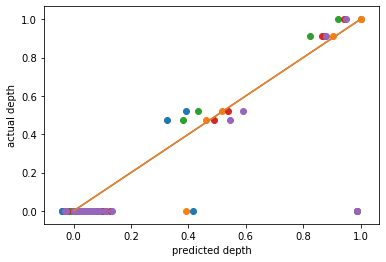

In [174]:
D_df_normalized = mms.fit_transform(D_df.iloc[0:, 1].values.reshape(-1,1))
for i in range(5):
    plt.scatter(recsys_df.iloc[0:, i].values, D_df_normalized) #plot predicted vs actual
    plt.xlabel('predicted depth')
    plt.ylabel('actual depth')
    plt.plot(np.arange(0,recsys_df.iloc[0:,i].max()))

Tough part, check predictions against known and use MAE error metric

In [210]:
recsys_df.T
recsys_df_toJoin = recsys_df.T.reset_index()

In [216]:
from sklearn.metrics import median_absolute_error
known_vals = df_holdout["Top MD"]
print(df_holdout.head())
for i in range(0, df_merged.iloc(0:, 5).max()):
    #loop through all form aliases
    
predicted_vals = np.array(prediction_list)
median_absolute_error(known_vals, predicted_vals)

        API Number  Northing   Easting  True Vertical Depth  Normalized TVD  \
2933  490251070700  961733.9  802774.0              -4401.0        0.095110   
2439  490251059500  965073.6  794723.3              -2121.5        0.434928   
3298  490251078100  967006.2  796184.8              -1015.0        0.599881   
542   490250952100  974478.6  792059.1              -2268.0        0.413089   
5466  490251118100  973327.5  794161.2              -2076.6        0.441622   

      Form Alias   Top MD  
2933         2.0    54.74  
2439        18.0  2783.22  
3298         0.0   229.35  
542          9.0  2293.08  
5466         8.0  2369.47  
        API Number       0.0       1.0       2.0       3.0       4.0  \
0     490250632500  0.877423  0.390160  0.327228  1.000275  0.414493   
1     490250632700  0.905365  0.517083  0.462665  1.000228  0.392812   
2     490250632800  0.825382  0.433869  0.379760  0.922948  0.987853   
3     490250632800  0.825382  0.433869  0.379760  0.922948  0.987853 

KeyError: 490251137100

Predicted depths

In [58]:
recsys_df.iloc[0:, 1]

Form Alias
0.0     0.070766
1.0     0.096140
2.0     0.095909
3.0     0.065480
4.0     0.071095
5.0     0.017508
6.0     0.016178
7.0     0.016823
8.0     0.013379
9.0     0.014360
10.0    0.012580
11.0    0.012732
12.0    0.020306
13.0    0.010764
14.0    0.011508
15.0    0.023259
16.0    0.018086
17.0    0.017144
18.0    0.013264
19.0    0.017777
20.0    0.014694
21.0    0.026038
22.0    0.015978
23.0    0.021011
24.0    0.022860
25.0    0.023222
26.0    0.023758
27.0    0.026053
28.0    0.014501
29.0    0.013736
30.0    0.013947
31.0    0.013041
32.0    0.013318
33.0    0.012319
34.0    0.024487
35.0    0.000632
36.0    0.003015
37.0    0.003630
38.0    0.004579
39.0    0.003630
40.0    0.006259
41.0    0.001919
43.0    0.005586
44.0    0.002824
45.0   -0.000368
46.0    0.001751
47.0    0.001964
48.0    0.001429
49.0    0.001760
50.0    0.001954
51.0    0.001751
52.0    0.000176
53.0    0.000176
54.0   -0.000368
55.0   -0.000368
57.0    0.028294
59.0    0.028294
Name: 490250632700, 

Actual depths

In [59]:
D_df.iloc[0:, 1]

Form Alias
0.0     877.38
1.0     503.67
2.0     455.35
3.0       0.00
4.0       0.00
5.0       0.00
6.0       0.00
7.0       0.00
8.0       0.00
9.0       0.00
10.0      0.00
11.0      0.00
12.0      0.00
13.0      0.00
14.0      0.00
15.0      0.00
16.0      0.00
17.0      0.00
18.0      0.00
19.0      0.00
20.0      0.00
21.0      0.00
22.0      0.00
23.0      0.00
24.0      0.00
25.0      0.00
26.0      0.00
27.0      0.00
28.0      0.00
29.0      0.00
30.0      0.00
31.0      0.00
32.0      0.00
33.0      0.00
34.0      0.00
35.0      0.00
36.0      0.00
37.0      0.00
38.0      0.00
39.0      0.00
40.0      0.00
41.0      0.00
43.0      0.00
44.0      0.00
45.0      0.00
46.0      0.00
47.0      0.00
48.0      0.00
49.0      0.00
50.0      0.00
51.0      0.00
52.0      0.00
53.0      0.00
54.0      0.00
55.0      0.00
57.0      0.00
59.0      0.00
Name: 490250632700, dtype: float64

Text(0, 0.5, 'Easting')

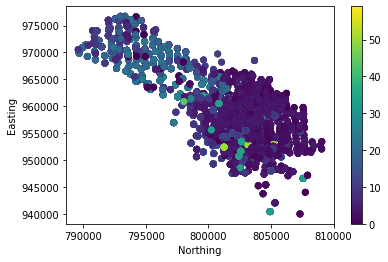

In [60]:
plt.scatter(df_merged.Easting, df_merged.Northing, c = df_merged.iloc[0:, 6])
plt.colorbar()
plt.xlabel("Northing")
plt.ylabel("Easting")

